In [1]:
from sklearn.metrics import accuracy_score, silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import manifold
from Dataset import Dataset
from scipy import ndimage
from Test import Test
import pandas as pd
import numpy as np
import umap
import time


In [ ]:
### MNIST VISUALIZATION WITHOUT UMAP ###
X_train, y_train, X_test, y_test = get_mnist()

print('X_train dimensions are {}'.format(X_train.shape))
y_pred = AgglomerativeClustering(n_clusters=len(np.unique(y_test))).fit_predict(X_train)
#print(accuracy_score(y_train[:20], np.logical_not(y_pred).astype('int')))
y_pred = get_k_means_accuracy(y_train, y_pred)  # accuracy on testing set
#print('y_pred is: {}'.format(y_pred))
accuracy = accuracy_score(y_train, y_pred)
print(np.unique(y_train, return_counts=True))
print('accuracy is: ', accuracy)

In [ ]:
### MNIST VISUALIZATION WITH UMAP
X_train, y_train, X_test, y_test = get_mnist()

print('X_train dimensions are {}'.format(X_train.shape))
y_pred = AgglomerativeClustering(n_clusters=len(np.unique(y_test))).fit_predict(X_train[:200])
#print(accuracy_score(y_train[:20], np.logical_not(y_pred).astype('int')))
y_pred = get_k_means_accuracy(y_train[:200], y_pred)  # accuracy on testing set
#print('y_pred is: {}'.format(y_pred))
accuracy = accuracy_score(y_train[:200], y_pred)
print(np.unique(y_train[:200], return_counts=True))
print(accuracy)


# initialize UMAP object
reducer = umap.UMAP(n_neighbors=20,
                    n_components=2)
# create embedded dataset
reducer.fit(X_train)
X_train = reducer.transform(X_train)
print('X_train dimensions are {}'.format(X_train.shape))
y_pred = AgglomerativeClustering(n_clusters=len(np.unique(y_test))).fit_predict(X_train[:100])
#y_pred = get_k_means_accuracy(y_train, y_pred)  # accuracy on testing set
accuracy = accuracy_score(y_train[:100], y_pred)
print('accuracy is: ', accuracy)

In [ ]:
n_samples, n_features = X_train.shape
np.random.seed(0)

#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
reducer = umap.UMAP(n_neighbors=20,n_components=4)
# create embedded dataset
reducer.fit(X_train)
X_train = reducer.transform(X_train)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

In [ ]:
### SHIPNET VISUALIZATION WITHOUT UMAP ###

In [ ]:
### SHIPNET VISUALIZATION WITH UMAP ###

In [11]:
### TRYING OUT BIRCH ###

dataset = Dataset(datasets.get_mnist())

brc = Birch(n_clusters=10)
brc.fit(dataset.X_train)
y_pred = brc.predict(dataset.X_train)
silhouette = silhouette_score(dataset.X_test, y_pred)
print(silhouette)


In [ ]:
### ITERATING THROUGH FUNCTIONS IN A PYTHON MODULE TO GET DATASETS

import datasets
import Dataset

# for name, val in datasets.__dict__.items():
#     if callable(val) and val.__name__.startswith('get_'):
#         if val.__name__ == 'get_coil20':
#             dataset = Dataset(val())

datasets_list = []
for ds_getter in datasets.__dict__.values():
    if callable(ds_getter) and ds_getter.__name__.startswith('get_'):
        datasets_list.append(ds_getter)

print(datasets_list)

In [ ]:
### UNDERSTANDING WHY SVM ON CIFAR100 DOESN'T WORK ###

start_time = time.process_time()
dataset = Dataset(datasets.get_cifar100())
end_time1 = time.process_time() - start_time
print('dataset retrieved, time taken: {}'.format(end_time1))

svm = LinearSVC()
svm.fit(dataset.X_train, dataset.y_train)
y_pred = svm.predict(dataset.X_test)
end_time2 = time.process_time() - end_time1
print('prediction done, time taken: {}'.format(end_time2))

base_accuracy = accuracy_score(dataset.y_test, y_pred)

end_time3 = time.process_time() - end_time2
print('baseline done, time taken: {}'.format(end_time3))
print('Baseline accuracy is: {}'.format(base_accuracy))
print(base_accuracy)

In [7]:
### GET KNN ON CIFAR100 BASELINE SCORE ###

dataset = Dataset(datasets.get_cifar100())
start = time.process_time()
knn = KNeighborsClassifier()
knn.fit(dataset.X_train, dataset.y_train)
y_pred = knn.predict(dataset.X_test)
elapsed = time.process_time() - start
print('It took ' + elapsed)
print(accuracy_score(y_test, y_pred))

In [ ]:
### EXPLORING HDBSCAN MODULE ###

import hdbscan
import time
import numpy as np
from Dataset import Dataset
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

start_time = time.process_time()

dataset = Dataset.mnist()

standard_embedding = umap.UMAP(random_state=42).fit_transform(dataset.X_train)
clusterable_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2,random_state=42).fit_transform(dataset.X_train)

labels = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=500).fit_predict(clusterable_embedding)

clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')

print(adjusted_rand_score(dataset.y_train, labels))
print(adjusted_mutual_info_score(dataset.y_train, labels))
print(np.sum(clustered) / dataset.X_train.shape[0])
# plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=dataset.y_train.astype(int), s=0.1, cmap='Spectral')

# clusterer = hdbscan.HDBSCAN(min_cluster_size=500, min_samples=1)

# clusterer.fit(dataset.X_train)

# clusterer.labels_

# import pandas as pd
# pd.Series(clusterer.labels_).value_counts()

# there is no way of setting the number of clusters

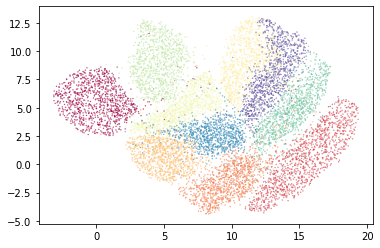

In [2]:
### VISUALIZING DATASETS ### #50, 2, 42, 0.0, 8, 380

import matplotlib.pyplot as plt
dataset = Dataset.mnist()
visualization_embedding = umap.UMAP(n_neighbors=30, n_components=2, random_state=42, min_dist=0.9).fit_transform(dataset.X_test)
standard_embedding = umap.UMAP(n_neighbors=50, n_components=9, random_state=42, min_dist=0.0).fit_transform(dataset.X_train)
plt.scatter(visualization_embedding[:, 0], visualization_embedding[:, 1], c=dataset.y_test.astype(int), s=0.1, cmap='Spectral')

[15.086842  4.038492]
clustered percentage: 0.7367166666666667
Number of clusters: 1    1162
3    1027
7    1026
0    1014
9     996
4     995
2     979
6     973
8     966
5     862
dtype: int64


NameError: name 'y_pred' is not defined

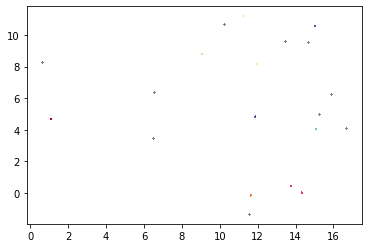

In [3]:
from sklearn.preprocessing import MinMaxScaler
import hdbscan
#print(standard_embedding.shape)
print(visualization_embedding[0])

#labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=20).fit_predict(standard_embedding)
# labels = KMeans(n_clusters=len(np.unique(dataset.y_test)), max_iter=200).fit_predict(
#                 dataset.X_train)
scaler = MinMaxScaler()
dataset.X_train = scaler.fit_transform(dataset.X_train)

svm = LinearSVC()
svm.fit(dataset.X_train, dataset.y_train)
labels = svm.predict(dataset.X_test)
clustered = (labels >= 0)
clustered = labels
print('clustered percentage: {}'.format(np.sum(clustered) / dataset.X_train.shape[0]))
print('Number of clusters: {}'.format(pd.Series(labels).value_counts()))
plt.scatter(visualization_embedding[~clustered, 0],
            visualization_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(visualization_embedding[clustered, 0],
            visualization_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')
#rand_score = adjusted_rand_score(dataset.y_train, labels)
#mutual_info = adjusted_mutual_info_score(dataset.y_train, labels)
# print(rand_score)
# print(mutual_info)
accuracy = accuracy_score(dataset.y_test, labels)
print(accuracy)

In [15]:
### Finding best parameters per dataset for HDBSCAN ###
from itertools import product
import hdbscan
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
datasets = ['cifar100', 'cifar10', 'fashion_mnist',
            'coil20', 'intel_img_class', 'shipnet', 'usps', 'umist']

min_cluster_size_tests = [50, 100, 200, 300, 500]
min_samples_tests = [None, 5, 10, 50, 100]

tests = [dict(zip(('min_cluster_size', 'min_samples'), (i, j)))
         for i, j in product(*[min_cluster_size_tests, min_samples_tests])]

results = pd.DataFrame()
dataset = Dataset.shipnet()
print(dataset.X_train.shape)
reducer = umap.UMAP(n_neighbors=50, n_components=50, min_dist=0.0)
dataset.X_train = reducer.fit_transform(dataset.X_train)
for test in tests:
    print('Starting new test')
    labels = hdbscan.HDBSCAN(min_samples=test['min_samples'], min_cluster_size=test['min_cluster_size']).fit_predict(dataset.X_train)
    rand_score = adjusted_rand_score(dataset.y_train, labels)
    mutual_info = adjusted_mutual_info_score(dataset.y_train, labels)
    clustered = (labels >= 0)
    not_noise = np.sum(clustered) / dataset.X_train.shape[0]
    result = {'min_cluster_size': test['min_cluster_size'], 'min_samples': test['min_samples'], 'rand_score': rand_score, 'mutual_info': mutual_info, 'not_noise': not_noise}
    results = results.append(result, ignore_index=True)
    print(result)
# for dataset_name in datasets:
#     dataset = getattr(Dataset, dataset_name)()
#     for test_params in tests:

(2800, 19200)
Starting new test
{'min_cluster_size': 50, 'min_samples': None, 'rand_score': 0.43885015575988123, 'mutual_info': 0.2611002577847419, 'not_noise': 0.8978571428571429}
Starting new test
{'min_cluster_size': 50, 'min_samples': 5, 'rand_score': 0.06440656500654869, 'mutual_info': 0.14013856955723836, 'not_noise': 0.5839285714285715}
Starting new test
{'min_cluster_size': 50, 'min_samples': 10, 'rand_score': 0.05194378727766878, 'mutual_info': 0.1477966919503956, 'not_noise': 0.6128571428571429}
Starting new test
{'min_cluster_size': 50, 'min_samples': 50, 'rand_score': 0.43885015575988123, 'mutual_info': 0.2611002577847419, 'not_noise': 0.8978571428571429}
Starting new test
{'min_cluster_size': 50, 'min_samples': 100, 'rand_score': 0.47236069908515743, 'mutual_info': 0.29579172098681455, 'not_noise': 0.8292857142857143}
Starting new test
{'min_cluster_size': 100, 'min_samples': None, 'rand_score': 0.47236069908515743, 'mutual_info': 0.29579172098681455, 'not_noise': 0.829285

In [17]:
print(np.max(results['rand_score']))
print(np.max(results['mutual_info']))
print(results['rand_score'].argmax())
print(results['mutual_info'].argmax())

0.47236069908515743
0.29579172098681455
4
4


1


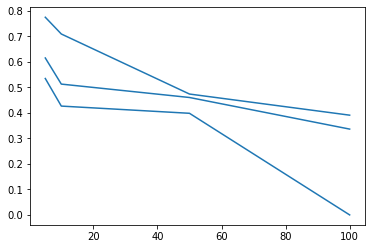

In [21]:
results.to_csv('hdbscan_baseline.csv', index=False, float_format='%.3f')
import matplotlib.pyplot as plt
#print(results)
results['total'] = results['rand_score'] + results['mutual_info']
print(results['total'].argmax())
plt.plot(results['min_samples'], results['mutual_info'])

#plt.show()

In [4]:
### EXPLORING AGGLOMERATIVE CLUSTERING ###

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

dataset = Dataset.mnist()

reducer = umap.UMAP(n_components=2, min_dist=0.0, n_neighbors=50)

start_time = time.process_time()
reducer.fit(dataset.X_train)
dataset.X_train = reducer.transform(dataset.X_train)
time1 = time.process_time() - start_time
print('dataset reduced. Time taken: {}'.format(time1))

# scaler = MinMaxScaler()
# dataset.X_train = scaler.fit_transform(dataset.X_train)
clustering = AgglomerativeClustering(n_clusters=10).fit_predict(dataset.X_train)

time2 = time.process_time() - time1
print('dataset fitted. Time taken: {}'.format(time2))

#takes a long time. It will not be used

dataset reduced. Time taken: 345.0625


In [ ]:
###  EXPLORING AGGLOMERATIVE CLUSTERING WITH SCIPY ###

import scipy.cluster.hierarchy as sch

dataset = Dataset(datasets.get_mnist())

#reduce
start_time = time.process_time()
reducer = umap.UMAP(n_components=2)
reducer.fit(dataset.X_train)
dataset.X_train = reducer.transform(dataset.X_train)
time1 = time.process_time() - start_time
print('time1 is: {}'.format(time1))

Z = sch.linkage(dataset.X_train, method='ward')
time2 = time.process_time() - time1
print('time2 is: {}'.format(time2))

#print(Z)
dendrogram = sch.dendrogram(Z)
time3 = time.process_time() - time2
print('time3 is: {}'.format(time3))

#time without umap is more than 8390
#time with umap is also very long. this will not be used

In [ ]:
###  EXPLORING MINI BATCH K-MEANS WITH SCIPY ###

In [53]:
### EXPLORING RESULTS ###
df = pd.read_csv('knn_results_usps.csv')
df

,accuracy,class_entropy,dataset,intr_dim,min_dist,n_components,n_neighbors,n_of_classes,n_of_features,n_of_instances,silhouette,time
0,0.420,0.986,usps,22.0,0.0,1.0,2.0,10.0,256.0,7291.0,0.116,59.0
1,0.822,0.986,usps,22.0,0.0,1.0,5.0,10.0,256.0,7291.0,0.116,35.0
2,0.656,0.986,usps,22.0,0.0,1.0,10.0,10.0,256.0,7291.0,0.116,49.0
3,0.494,0.986,usps,22.0,0.0,1.0,20.0,10.0,256.0,7291.0,0.116,50.0
4,0.554,0.986,usps,22.0,0.0,1.0,50.0,10.0,256.0,7291.0,0.116,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.819,0.986,usps,22.0,0.0,44.0,2.0,10.0,256.0,7291.0,0.116,32.0
216,0.260,0.986,usps,22.0,0.0,44.0,5.0,10.0,256.0,7291.0,0.116,59.0
217,0.166,0.986,usps,22.0,0.0,44.0,10.0,10.0,256.0,7291.0,0.116,91.0
218,0.179,0.986,usps,22.0,0.0,44.0,20.0,10.0,256.0,7291.0,0.116,138.0


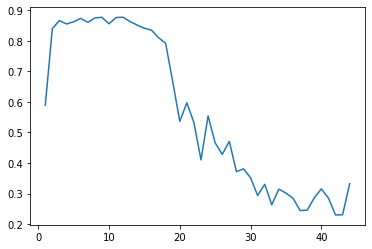

In [54]:
#tmp_df = df[df['n_components'] == 1].iloc[:, [0]].mean()
mean_accuracies = df.groupby(['n_components'])['accuracy'].mean()
#display(tmp_df)
#display(df[df['n_components'] == 1])
plt.plot(np.unique(df['n_components']), mean_accuracies.values)